In [9]:
import numpy as np
import xarray as xr
import pandas as pd
import warnings
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from scipy.ndimage.filters import gaussian_filter
warnings.filterwarnings('ignore')
import seawater as sw
from dask.diagnostics import ProgressBar

import glob


In [2]:
fsource = sorted(glob.glob('/home/bruno/git/globcolour/gsm-chl/*.nc'))

In [3]:
source   =  [xr.open_dataset(i, chunks={}) for i in fsource]
source = xr.concat(source, dim='time')

/home/bruno/miniconda3/envs/ocean/lib/python3.7/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [ ]:
# print('atributos:')
# print(source.attrs)

In [4]:
source = source.assign_coords({'time':pd.date_range("1998-01-01", periods=8429)})

In [5]:
pack = source.sel(time=slice('1998-01-01','2020-12-31'))

In [6]:
CHL1 = pack.CHL1_mean.sel(lon=slice(-50.0, -40.0), lat=slice(-21.0, -28))

In [7]:
print(CHL1)

<xarray.DataArray 'CHL1_mean' (time: 8401, lat: 168, lon: 240)>
dask.array<getitem, shape=(8401, 168, 240), dtype=float32, chunksize=(1, 168, 240), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -21.02 -21.06 -21.1 -21.15 ... -27.9 -27.94 -27.98
  * lon      (lon) float32 -49.98 -49.94 -49.9 -49.85 ... -40.1 -40.06 -40.02
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2020-12-31
Attributes:
    standard_name:            mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:                Chlorophyll concentration - Mean of the binned ...
    units:                    mg/m3
    pct_characterised_error:  43.31


In [23]:
m_chl = CHL1.groupby("time.month").mean()

In [24]:
jan_chl = np.log10(m_chl).sel(month=1)
feb_chl = np.log10(m_chl).sel(month=2)
mar_chl = np.log10(m_chl).sel(month=3)
apr_chl = np.log10(m_chl).sel(month=4)
may_chl = np.log10(m_chl).sel(month=5)
jun_chl = np.log10(m_chl).sel(month=6)
jul_chl = np.log10(m_chl).sel(month=7)
aug_chl = np.log10(m_chl).sel(month=8)
set_chl = np.log10(m_chl).sel(month=9)
out_chl = np.log10(m_chl).sel(month=10)
nov_chl = np.log10(m_chl).sel(month=11)
dez_chl = np.log10(m_chl).sel(month=12)

In [12]:
chl1=CHL1.groupby("time.season").mean()

In [13]:
chl1_summer = chl1.sel(season='DJF')
chl1_winter = chl1.sel(season='JJA')
chl1_spring = chl1.sel(season='SON')
chl1_autunm = chl1.sel(season='MAM')

In [15]:
lon = chl1.lon
lat = chl1.lat

In [14]:
### cartopy definitions


land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

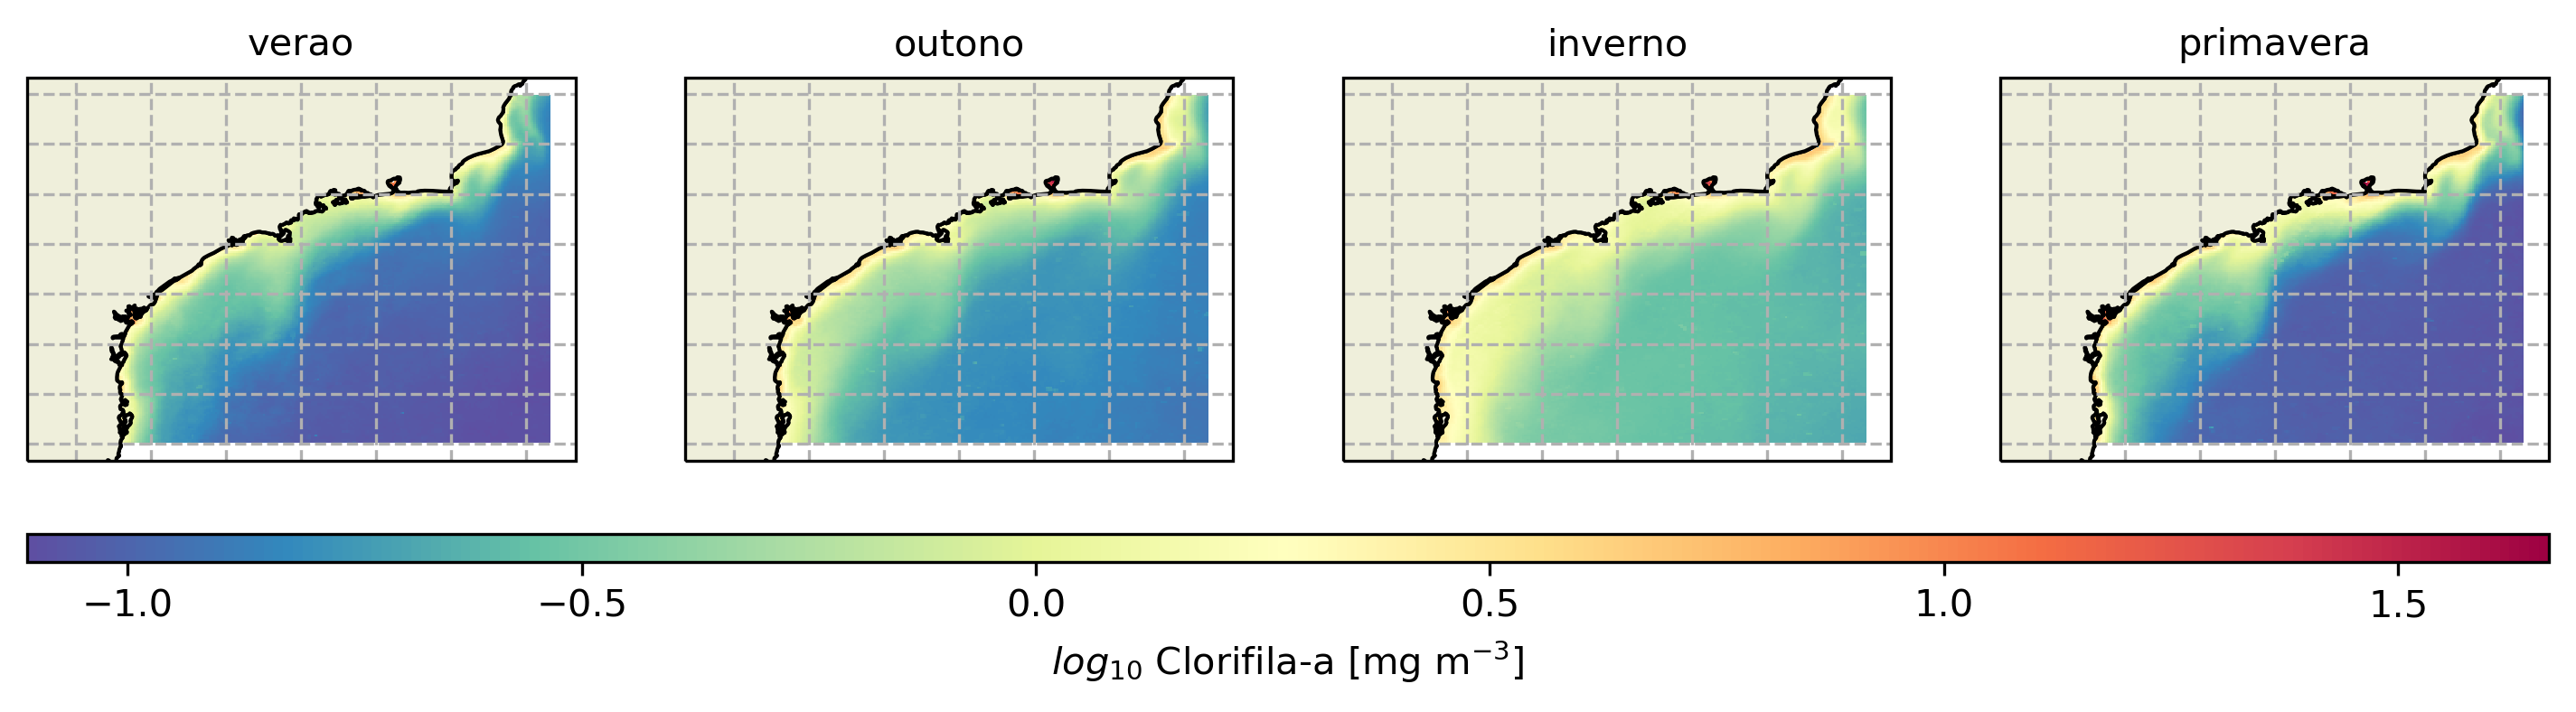

In [22]:
# sub-plot 12 meses

fig1 = plt.figure(figsize=(12, 12), dpi=300)

gs  = gridspec.GridSpec(1, 4)

#plot 1

m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon, lat, np.log10(chl1_summer), shading='flat', cmap='Spectral_r')
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(linestyle='--', draw_labels = False)
g1.xlabels_top = False
g1.xlabels_bottom = False
g1.ylabels_left = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'black'}
g1.ylabel_style = {'size': 12, 'color': 'black'}

plt.title('verao', fontsize=10)

#plot 2

m2 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f2 = plt.pcolormesh(lon, lat,  np.log10(chl1_autunm), shading='flat', cmap='Spectral_r')
m2.coastlines(resolution=land_resolution, color='black', linewidth=1)
m2.add_feature(land_poly)
g2 = m2.gridlines(linestyle='--', draw_labels = False)
g2.xlabels_top_= False
g2.xlabels_bottom = False
g2.ylabels_left = False
g2.ylabels_right = False
g2.xlabel_style = {'size': 12, 'color': 'black'}
g2.ylabel_style = {'size': 12, 'color': 'black'}

plt.title('outono', fontsize=10)

#plot 3

m3 = plt.subplot(gs[0,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f3 = plt.pcolormesh(lon, lat, np.log10(chl1_winter), shading='flat', cmap='Spectral_r')
m3.coastlines(resolution=land_resolution, color='black', linewidth=1)
m3.add_feature(land_poly)
g3 = m3.gridlines(linestyle='--', draw_labels = False)
g3.xlabels_top_= False
g3.xlabels_bottom = False
g3.xlabels_left = False
g3.ylabels_right = False
g3.xlabel_style = {'size': 12, 'color': 'black'}
g3.ylabel_style = {'size': 12, 'color': 'black'}

plt.title('inverno', fontsize=10)

#plot 4

m4 = plt.subplot(gs[0,3], projection=ccrs.PlateCarree(central_longitude=0.0))
f4 = plt.pcolormesh(lon, lat, np.log10(chl1_spring), shading='flat', cmap='Spectral_r')
m4.coastlines(resolution=land_resolution, color='black', linewidth=1)
m4.add_feature(land_poly)
g4 = m4.gridlines(linestyle='--', draw_labels = False)
g4.xlabels_top_= False
g4.xlabels_bottom = False
g4.ylabels_left = False
g4.ylabels_right = False
g4.xlabel_style = {'size': 12, 'color': 'black'}
g4.ylabel_style = {'size': 12, 'color': 'black'}

plt.title('primavera', fontsize=10)


# COLOBAR

cbar = fig1.colorbar(f1, ax=[m,m2,m3,m4], orientation="horizontal", aspect=90, fraction=0.02, pad=0.03)
cbar.set_label(r'$log_{10}$ Clorifila-a [mg m$^{-3}$]')

plt.show()


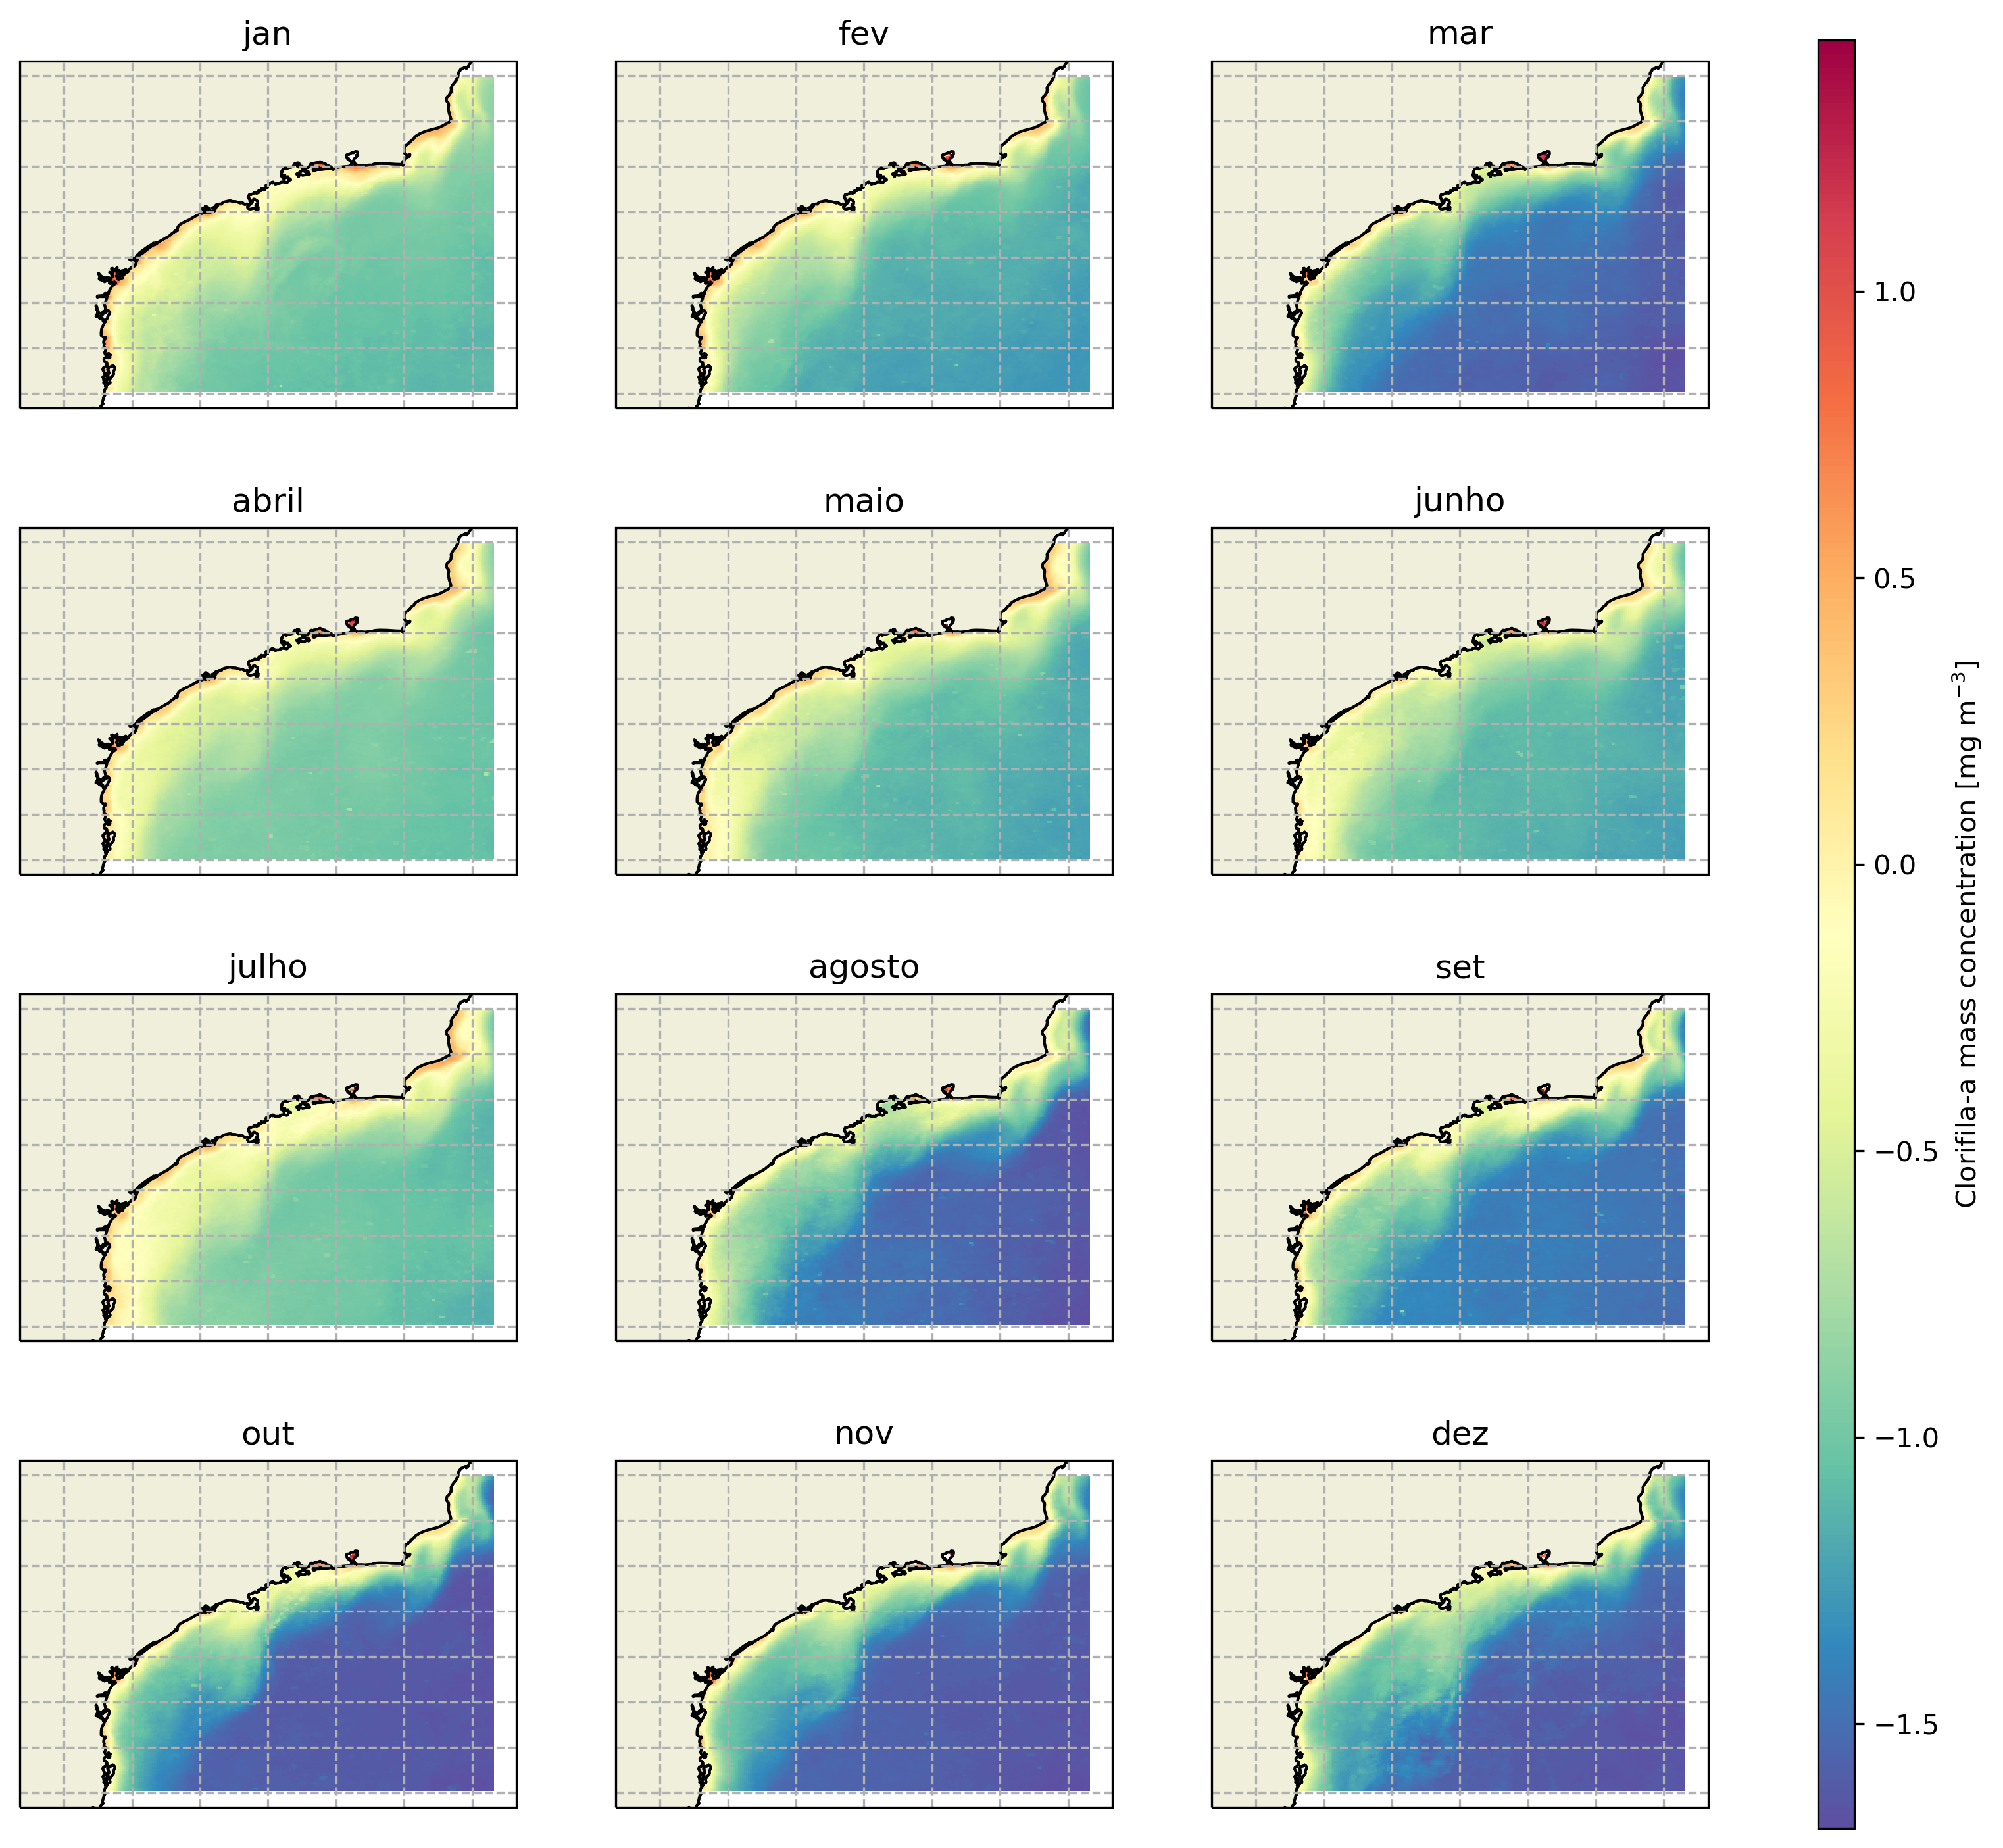

In [28]:
### CARTOPY SUBPLOT ###

#%%capture

fig1 = plt.figure(figsize=(12, 12), dpi=300)

gs  = gridspec.GridSpec(4, 3)



m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon, lat, jan_chl, shading='flat', cmap='Spectral_r')
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(linestyle='--', draw_labels = False)
g1.xlabels_top = False
g1.xlabels_bottom = False
g1.ylabels_left = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'black'}
g1.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('jan', fontsize=12)

#plot feb
m2 = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f2 = plt.pcolormesh(lon, lat, apr_chl, shading='flat', cmap='Spectral_r')
m2.coastlines(resolution=land_resolution, color='black', linewidth=1)
m2.add_feature(land_poly)
g2 = m2.gridlines(linestyle='--', draw_labels = False)
g2.xlabels_top_= False
g2.xlabels_bottom = False
g2.ylabels_left = False
g2.ylabels_right = False
g2.xlabel_style = {'size': 12, 'color': 'black'}
g2.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f2, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('abril', fontsize=12)

#plot mar
m3 = plt.subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f3 = plt.pcolormesh(lon, lat, jul_chl, shading='flat', cmap='Spectral_r')
m3.coastlines(resolution=land_resolution, color='black', linewidth=1)
m3.add_feature(land_poly)
g3 = m3.gridlines(linestyle='--', draw_labels = False)
g3.xlabels_top_= False
g3.xlabels_bottom = False
g3.xlabels_left = False
g3.ylabels_right = False
g3.xlabel_style = {'size': 12, 'color': 'black'}
g3.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f3, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('julho', fontsize=12)

#plot apr

m4 = plt.subplot(gs[3,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f4 = plt.pcolormesh(lon, lat, out_chl,  shading='flat', cmap='Spectral_r')
m4.coastlines(resolution=land_resolution, color='black', linewidth=1)
m4.add_feature(land_poly)
g4 = m4.gridlines(linestyle='--', draw_labels = False)
g4.xlabels_top_= False
g4.xlabels_bottom = False
g4.ylabels_left = False
g4.ylabels_right = False
g4.xlabel_style = {'size': 12, 'color': 'black'}
g4.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f4, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('out', fontsize=12)

#plot may

m5 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f5 = plt.pcolormesh(lon, lat, feb_chl, shading='flat', cmap='Spectral_r')
m5.coastlines(resolution=land_resolution, color='black', linewidth=1)
m5.add_feature(land_poly)
g5 = m5.gridlines(linestyle='--', draw_labels = False)
g5.xlabels_top= False
g5.xlabels_bottom = False
g5.ylabels_left = False
g5.ylabels_right = False
g5.xlabel_style = {'size': 12, 'color': 'black'}
g5.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f5, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('fev', fontsize=12)

#plot jun

m6 = plt.subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f6 = plt.pcolormesh(lon, lat, may_chl, shading='flat', cmap='Spectral_r')
m6.coastlines(resolution=land_resolution, color='black', linewidth=1)
m6.add_feature(land_poly)
g6 = m6.gridlines(linestyle='--', draw_labels = False)
g6.xlabels_top_= False
g6.xlabels_bottom = False
g6.ylabels_left = False
g6.ylabels_right = False
g6.xlabel_style = {'size': 12, 'color': 'black'}
g6.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f6, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('maio', fontsize=12)

#plot jul

m7 = plt.subplot(gs[2,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f7 = plt.pcolormesh(lon, lat, aug_chl, shading='flat', cmap='Spectral_r')
m7.coastlines(resolution=land_resolution, color='black', linewidth=1)
m7.add_feature(land_poly)
g7 = m7.gridlines(linestyle='--', draw_labels = False)
g7.xlabels_top_= False
g7.xlabels_bottom = False
g7.ylabels_right = False
g7.ylabels_left = False
g7.xlabel_style = {'size': 12, 'color': 'black'}
g7.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f7, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('agosto', fontsize=12)

#plot aug

m8 = plt.subplot(gs[3,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f8 = plt.pcolormesh(lon, lat, nov_chl, shading='flat', cmap='Spectral_r')
m8.coastlines(resolution=land_resolution, color='black', linewidth=1)
m8.add_feature(land_poly)
g8 = m8.gridlines(linestyle='--', draw_labels = False)
g8.xlabels_top_= False
g8.xlabels_bottom = False
g8.ylabels_left = False
g8.ylabels_right = False
g8.xlabel_style = {'size': 12, 'color': 'black'}
g8.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f8, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('nov', fontsize=12)


#plot set

m9 = plt.subplot(gs[0,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f9 = plt.pcolormesh(lon, lat, mar_chl, shading='flat', cmap='Spectral_r')
m9.coastlines(resolution=land_resolution, color='black', linewidth=1)
m9.add_feature(land_poly)
g9 = m9.gridlines(linestyle='--', draw_labels = False)
g9.xlabels_top= False
g9.xlabels_bottom = False
g9.ylabels_right = False
g9.ylabels_left = False
g9.xlabel_style = {'size': 12, 'color': 'black'}
g9.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f9, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('mar', fontsize=12)

#plot out 

m10 = plt.subplot(gs[1,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f10 = plt.pcolormesh(lon, lat, jun_chl, shading='flat', cmap='Spectral_r')
m10.coastlines(resolution=land_resolution, color='black', linewidth=1)
m10.add_feature(land_poly)
g10 = m10.gridlines(linestyle='--', draw_labels = False)
g10.xlabels_top_= False
g10.xlabels_bottom = False
g10.ylabels_right = False
g10.ylabels_left = False
g10.xlabel_style = {'size': 12, 'color': 'black'}
g10.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f10, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('junho', fontsize=12)

#plot nov
m11 = plt.subplot(gs[2,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f11 = plt.pcolormesh(lon, lat, set_chl, shading='flat', cmap='Spectral_r')
m11.coastlines(resolution=land_resolution, color='black', linewidth=1)
m11.add_feature(land_poly)
g11 = m11.gridlines(linestyle='--', draw_labels = False)
g11.xlabels_top_= False
g11.xlabels_bottom = False
g11.ylabels_right = False
g11.ylabels_left = False 
g11.xlabel_style = {'size': 12, 'color': 'black'}
g11.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f11, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('set', fontsize=12)

#plot dez

m12 = plt.subplot(gs[3,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f12 = plt.pcolormesh(lon, lat, dez_chl, shading='flat', cmap='Spectral_r')
m12.coastlines(resolution=land_resolution, color='black', linewidth=1)
m12.add_feature(land_poly)
g12 = m12.gridlines(linestyle='--', draw_labels = False)
g12.xlabels_top = False
g12.xlabels_bottom = False
g12.ylabels_right = False
g12.ylabels_left = False
g12.xlabel_style = {'size': 12, 'color': 'black'}
g12.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f12, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('dez', fontsize=12)


# COLOBAR

cbar = fig1.colorbar(f1, ax=[m,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12], orientation="vertical", aspect=50, fraction=0.02, pad=0.06)
cbar.set_label(r'Clorifila-a mass concentration [mg m$^{-3}$]')

plt.show()


In [ ]:
#zoom in monthly (dez only plot)

In [ ]:
#spatial mask using .where()

# LOAD BATHYMETRY DATA

bat_dado = xr.open_dataset('/home/bruno/git/CMEMS/gebco/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

In [ ]:
# with ProgressBar():
#     mean_chl = mask_cdm.mean(['longitude','latitude']).compute()

In [ ]:
# load batimetria

#dado = xr.open_dataset('/home/bruno/git/CMEMS/gebco/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

In [ ]:
# mask_bat = dado.interp({'lon':mask_chl1.lon, 'lat':mask_chl1.lat}).elevation
# dado.close()
# mask_chl1.close()

In [ ]:
#shelf_chl = mask_chl1.where((mask_bat>-200)&(mask_bat<-10 ))

In [ ]:
#